In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import cv2

In [70]:
# Check GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("TensorFlow version:", tf.__version__)

GPU Available:  []
TensorFlow version: 2.19.0


In [71]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [72]:
DATA_PATH = r'E:\Python\Research\Tea leaf\Code\Dataset'

In [73]:
#Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [74]:
data_dir = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_PATH,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
)

Found 2498 files belonging to 5 classes.


In [75]:
class_names = data_dir.class_names
print(f"Class names: {class_names}")
print(f"Dataset len: {len(data_dir)}")

Class names: ['Brown_Blight', 'Gray_Blight', 'Healthy_Leaf', 'Helopeltis', 'Red_Rust']
Dataset len: 79


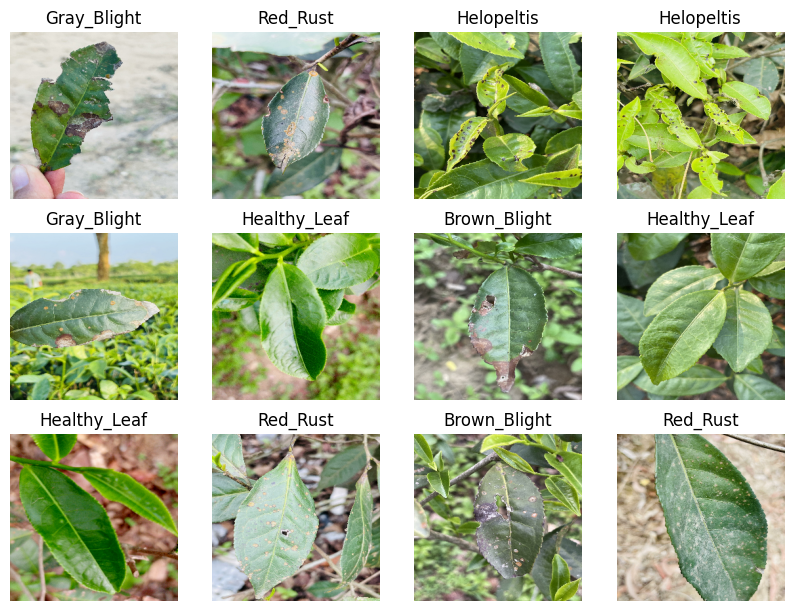

In [76]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_dir.take(2):
    for i in range(12):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')